# Exponential integrate and fire

Extends leaky integrate and fire to better match HH model, real world data. Around resting potential dynamics dominated by linear term, but no sharp firing threshold - dynamics around firing given by exponential behaviour

*Leaky integrate and fire:*   
$C \frac{dU}{dt} = g_l (V_{rest} - U) + I_{ext} $  
$\tau \frac{dU}{dt} = (V_{rest} - U) +  R_l I_{ext}$  
Reset at threshold v_spike

*Exponential integrate and fire:*   
$\tau \frac{dU}{dt} = (V_{rest} - U) +  \Delta T \exp((U - v_{rh})/\Delta T) + R_l I_{ext}$   
Reset at threshold v_spike, much higher than theshold for exponential behaviour ($v_{rh}$).

nr of spikes: 7


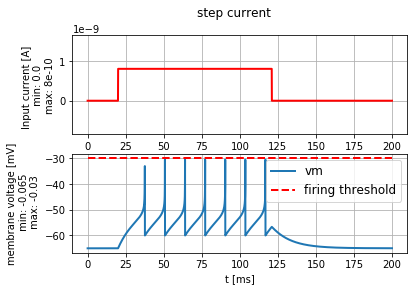

In [1]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory


input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

MEMBRANE_TIME_SCALE_tau = 12.0 * b2.ms  
MEMBRANE_RESISTANCE_R = 20.0 * b2.Mohm  
V_REST = -65.0 * b2.mV  
V_RESET = -60.0 * b2.mV  
RHEOBASE_THRESHOLD_v_rh = -55.0 * b2.mV  
SHARPNESS_delta_T = 2.0 * b2.mV  
FIRING_THRESHOLD_v_spike = -30. * b2.mV  

What is the minimum current that creates a spike? 

minimum $\frac{dU}{dt}$ is  when $-1 + \exp((U - v_{rh})/\Delta T) = 0$  
Thefore when $U = v_{rh}$

For infinite pulse length, should be when $I = (v_{rh} - v_{rest} - \Delta T )/R $


In [13]:
(65-55 - 2) * b2.mV/(20.0 * b2.Mohm)

0.4 * namp

nr of spikes: 1


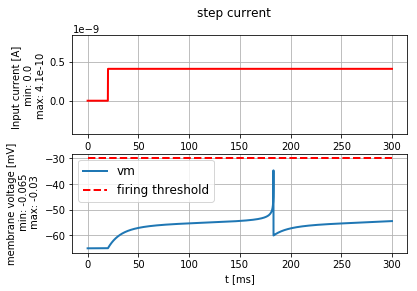

In [18]:
input_current = input_factory.get_step_current(
    t_start=20, t_end=300, unit_time=b2.ms, amplitude=0.41 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=300*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 1


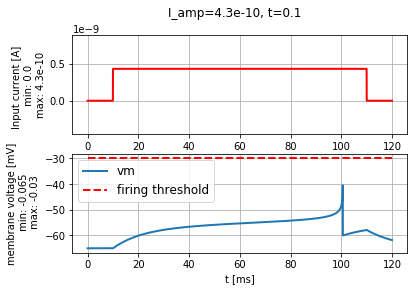

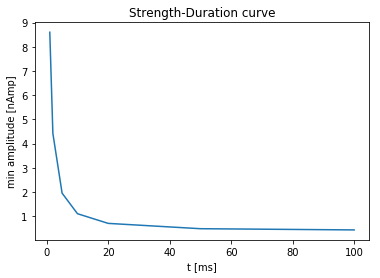

In [38]:
i=-1  #change i and find the value that goes into min_amp
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [8.6, 4.42, 1.95, 1.10, .70, .48, 0.43]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))
plt.show()
plt.close()
plt.plot(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")
plt.show()
plt.close()